In [6]:
%load_ext autoreload
%autoreload 2

import json
from os import path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


from sklearn import preprocessing
from ONN_eeg import ONN
import threading, time

np.seterr(all='raise')

import scipy
from scipy import signal
import DataUtils as dutl

#import matplotlib as mpl
#mpl.rcParams['agg.path.chunksize'] = 5648576 

dutils = dutl.DataUtils()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
%matplotlib widget
arr = np.array([0.00022573837340200478, 4429.906997775501])
np.power(1.0774737962681116-0.049937786342965015j, arr)

array([ 1.00001709e+000-1.04550162e-005j,
       -2.39612454e+145+3.44449700e+145j])

In [8]:
import os
cwd = os.getcwd()
print(cwd)

/home/jupyter-avinash/ranjan_env_15_Feb_2023/mouse_brain_project/hopf_oscillator/Workspace


In [9]:
dutils.available_session()

Available sessions:
['estim_vis_2022-03-31_12-03-06', 'histology', 'signal_test_2022-02-08_13-19-49', 'urethane_vis_2022-04-01_10-58-41']


In [10]:
dutils.experiment_info()

Experiment type: sensory stimulation
SomnoSuite log file not found.
Body camera file not found.
Pupil camera file not found.
{'sample_rate': 500, 'num_chs': 40, 'bit_volts': 0.19499999284744263, 'units': 'uV', 'continuous': '/home/jupyter-avinash/datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/recording1/continuous/Rhythm_FPGA-101.0/continuous.dat', 'timestamps': '/home/jupyter-avinash/datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/recording1/continuous/Rhythm_FPGA-101.0/timestamps_master_clock.npy'}


In [11]:
dutils.load_data()

/home/jupyter-avinash/datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/recording1/sensory_stim_log.csv


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
12.487579,-21.839999,-0.195000,22.619999,-41.729998,-20.279999,15.209999,-27.689999,-20.279999,-8.580000,-23.204999,-17.744999,-20.669999,-15.209999,-34.514999,-36.659999,-47.384998,-38.999999,-28.859999,-58.499998,-26.324999,-85.409997,7.605000,-61.229998,-89.894997,11.700000,-77.024997,-88.724997,14.234999,-30.224999,-69.224997
12.489579,-7.800000,27.104999,44.264998,0.000000,9.750000,42.314998,-5.850000,29.249999,38.219999,21.254999,28.664999,26.324999,25.739999,14.429999,3.900000,0.195000,-1.755000,15.404999,-18.719999,11.505000,-33.734999,50.894998,-1.560000,-32.564999,47.189998,-5.070000,-30.809999,39.194999,13.844999,-19.109999
12.491579,-1.170000,37.439999,61.229998,26.519999,49.724998,69.224997,22.424999,48.749998,57.719998,34.514999,43.094998,34.904999,36.464999,22.229999,14.624999,2.730000,-15.599999,19.304999,-45.239998,14.039999,-27.494999,76.244997,43.874998,33.344999,81.119997,49.139998,-6.630000,60.059998,32.174999,-15.404999
12.493579,22.034999,34.709999,52.259998,38.804999,45.629998,62.789998,28.664999,52.454998,62.009998,33.929999,50.699998,44.654998,48.359998,37.244999,28.274999,11.700000,-12.285000,27.884999,-42.314998,13.649999,-23.984999,78.584997,62.204998,38.219999,82.484997,67.859998,-3.315000,59.669998,45.629998,-4.875000
12.495579,22.814999,27.104999,44.264998,46.019998,53.039998,58.499998,23.399999,54.014998,62.789998,30.809999,54.794998,44.069998,62.789998,48.944998,38.024999,24.374999,2.730000,45.629998,1.755000,52.064998,24.179999,78.779997,78.974997,49.334998,72.734997,70.979997,15.794999,50.504998,50.114998,-1.950000


In [12]:
dutils.eegdata.to_csv("mouse_599975_continuous.csv")

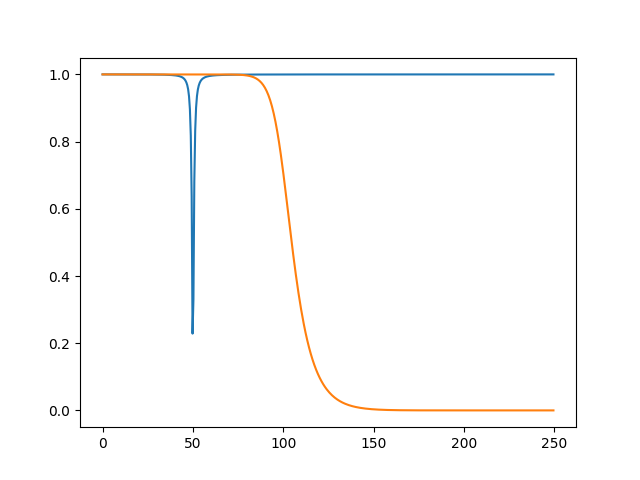

In [13]:
dutils.filter_data()

In [14]:
dutils.preprocess_data()

dict_keys([(0, 'biphasic', '30'), (0, 'biphasic', '50'), (0, 'biphasic', '70'), (0, 'circle', 'white'), (1, 'biphasic', '30'), (1, 'biphasic', '50'), (1, 'biphasic', '70'), (1, 'circle', 'white')])


,stim_type,parameter,onset,offset,duration,sweep
0,biphasic,30,313.17998,313.18038,0.00040,0
1,biphasic,30,317.04933,317.04973,0.00040,0
2,biphasic,50,321.01047,321.01087,0.00040,0
3,biphasic,70,325.49254,325.49294,0.00040,0
4,biphasic,70,329.14937,329.14977,0.00040,0
...,...,...,...,...,...,...
955,circle,white,5260.03320,5260.28254,0.24934,1
956,circle,white,5264.48693,5264.73626,0.24933,1
957,circle,white,5268.64042,5268.90643,0.26601,1
958,circle,white,5273.11081,5273.36016,0.24935,1


No. of eeg data segments:  960
(4776.24567, 4779.24567]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
4776.246935,69.462516,45.932395,38.619619,22.184201,32.875677,46.602022,37.105831,28.947819,33.659630,19.362389,20.739168,-1.822933,-22.880615,2.778434,-14.686730,-35.862375,-56.922811,-51.696736,-105.386232,-16.706713,-17.507430,45.843811,106.031349,136.742967,61.988859,188.039792,195.424575,61.143129,133.842144,171.883521
4776.248935,80.897285,50.585056,45.088260,49.397855,66.960557,62.539411,105.553830,76.499084,56.291121,90.132577,66.118698,32.194715,-17.180875,27.168907,-13.257953,-40.918160,-62.232277,-53.577771,-115.243563,-23.052633,-40.857155,44.535706,95.361336,125.288731,61.647003,179.319244,196.087234,62.292355,130.482748,175.214209
4776.250935,89.325453,53.875117,52.000035,82.052407,102.363973,81.552949,159.219199,120.828776,85.102654,138.041564,109.434916,73.545240,8.793066,58.326290,4.478428,-25.516184,-46.669975,-27.700858,-91.791404,-2.958859,-37.262140,56.569070,91.347115,114.329935,69.663991,167.233692,185.703822,66.023092,126.962150,170.086981
4776.252935,92.551497,56.717172,59.018812,111.825940,131.565092,99.837262,188.765752,153.725000,113.751718,162.048674,143.581114,110.300929,43.975899,87.931538,28.983047,-1.002252,-21.097409,10.929948,-47.998232,34.692688,-7.684896,76.446301,87.664884,98.630301,82.404554,138.958742,155.042472,72.227311,123.333232,153.259692
4776.254935,89.940036,59.590992,64.032653,129.820859,149.815748,111.745717,198.069370,171.523887,133.110060,171.756027,164.359219,132.695079,72.069659,108.790676,48.031521,18.496707,0.825258,42.443908,-3.432232,70.097131,24.535102,91.614656,80.335475,78.695919,90.970847,99.147945,110.911563,76.653321,116.098252,125.546928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779.236999,37.994870,-1.342696,-15.751418,48.981895,67.819127,11.397175,65.294635,55.551382,39.726086,58.388023,62.725723,58.307464,72.514106,64.841218,94.366157,112.554578,134.820605,88.561291,125.999087,51.615884,79.435148,-12.978925,5.028556,24.711235,-26.690771,-19.027862,28.538280,-33.559182,-8.553992,40.734101
4779.238999,33.251519,-3.960510,-17.801031,40.499323,56.535765,5.382789,61.859533,47.468995,29.471275,48.942842,51.423570,43.553112,59.740287,49.481100,83.228055,106.896855,143.204986,82.861916,140.857263,54.009550,92.992628,-17.608285,2.926185,27.731830,-30.338415,-31.074635,24.684438,-37.156156,-13.533532,39.237752
4779.240999,29.399220,-6.512780,-19.259652,27.058338,41.225889,-2.676397,55.591111,36.064173,15.961846,36.946394,35.694691,23.799601,40.171641,29.086382,65.811076,94.237757,143.269780,68.475965,147.074868,50.453676,100.532104,-24.495395,-0.411654,28.032713,-33.480506,-38.878764,17.798816,-38.592754,-15.626669,36.418217
4779.242999,25.065784,-9.054518,-20.826790,7.494710,23.388001,-11.854717,45.438208,21.683455,1.829295,23.707173,18.022612,1.873450,15.931589,6.172206,41.102323,71.913472,130.647058,45.592137,139.327412,37.796301,97.176047,-33.859054,-6.937656,24.155790,-37.270395,-42.162199,13.604400,-37.804532,-14.328308,35.710231


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
4776.246935,9.856797,0.460899,-3.872864,14.640728,14.995744,1.747716,14.444038,12.600355,7.399322,12.978351,13.129633,11.562732,5.040585,13.052597,5.054244,1.401181,-0.537592,1.389061,-2.080675,-3.919086,-4.037144,-2.920144,-2.732600,-1.588730,-4.688527,-2.565082,-0.609600,-5.485722,-2.392540,0.359425
4776.248935,9.830527,1.118570,-2.825645,15.537205,16.188213,3.352384,14.789871,13.636594,9.082474,13.423054,13.990221,12.605950,6.591773,14.282166,6.387639,2.883028,1.275566,3.189172,0.419393,-0.256332,-0.695890,-0.163017,1.193716,2.180464,-2.217419,2.230183,2.198216,-4.140556,-0.687132,1.825049
4776.250935,8.606659,1.380195,-2.004320,15.128050,16.024198,4.261045,13.975958,13.322312,9.634487,12.403749,13.366572,11.911921,7.420195,14.208173,7.155408,4.275820,3.429188,4.595658,2.834012,2.849914,2.525210,1.912272,4.606736,5.418862,-0.278939,6.045365,4.672617,-2.965733,0.639793,3.284871
4776.252935,7.127844,1.226816,-1.628830,13.722931,14.842179,4.302828,12.773266,12.158554,9.121234,11.069401,12.046459,10.373966,7.450439,13.254897,7.285014,5.034571,4.752273,5.159547,4.264579,4.665871,5.185087,2.803851,6.728603,7.500284,0.630203,8.015521,6.483532,-2.229763,1.360172,4.305368
4776.254935,6.132712,0.780751,-1.814081,12.042897,13.349681,3.615646,12.142197,11.016968,8.025849,10.703553,11.094310,9.384873,6.956427,12.138795,6.911527,4.816535,4.471397,4.830900,4.444581,5.072244,7.016736,2.525330,7.163014,8.025953,0.422185,8.062827,7.014440,-2.222018,1.258855,4.339981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779.236999,-1.757371,-3.652004,-3.666205,-2.800613,-2.626786,-4.509143,-2.794266,-3.458697,-4.177222,-3.599631,-3.605376,-2.804400,-3.738967,-1.623133,-0.696020,-0.812316,-1.960506,-3.726536,-3.869741,-5.822282,-7.383274,-5.572901,-5.277428,-4.426517,-4.718149,-3.567162,-0.514865,-2.979990,-1.141335,1.789769
4779.238999,-1.313816,-3.707706,-4.042338,-1.489268,-1.581698,-4.550789,-2.445853,-2.828571,-3.929554,-3.140106,-2.868496,-1.888663,-3.514822,-0.305612,0.006065,-0.167736,-1.045523,-3.445428,-2.843225,-6.197300,-7.486879,-6.452622,-6.084697,-4.428405,-5.292933,-4.320968,-0.052230,-3.459519,-1.381817,1.764434
4779.240999,-0.586562,-3.530016,-4.354108,-0.366349,-0.387587,-4.770822,-1.654488,-2.067730,-3.735031,-2.592675,-2.270838,-1.282809,-3.484401,1.067457,0.570637,-0.027976,-1.082293,-3.656662,-2.656890,-6.451633,-6.448601,-7.485870,-6.275942,-3.656771,-6.108062,-4.134978,0.246233,-3.956053,-1.455641,1.719874
4779.242999,0.260927,-3.178458,-4.490183,0.637029,0.972111,-4.935512,-0.135436,-0.967960,-3.404164,-1.610731,-1.524327,-0.851460,-3.500654,2.381599,0.905164,-0.345791,-1.807781,-4.168457,-3.173037,-6.588554,-4.809320,-8.336672,-5.967477,-2.487071,-6.874739,-3.655885,0.403772,-4.254515,-1.387001,1.675987


(1500,)


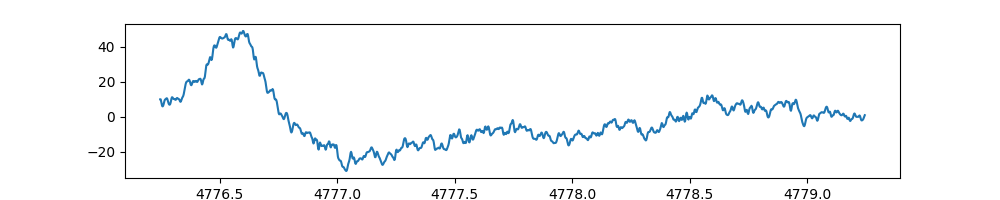

In [15]:
#Use processed data instead of eeg data
#time = processedData.index
#C1 = processedData.iloc[:,0]
time = dutils.segmented_data.index
C1 = dutils.segmented_data.iloc[:,0]
time = dutils.ERP.index#[0:1500]
C1 = dutils.ERP.iloc[0:1500,0]

time = np.array(time)#[0:1000]
C1 = np.array(C1)#[0:1000]
print(C1.shape)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(2)
plt.plot(time, C1)

Text(0, 0.5, 'amplitude')

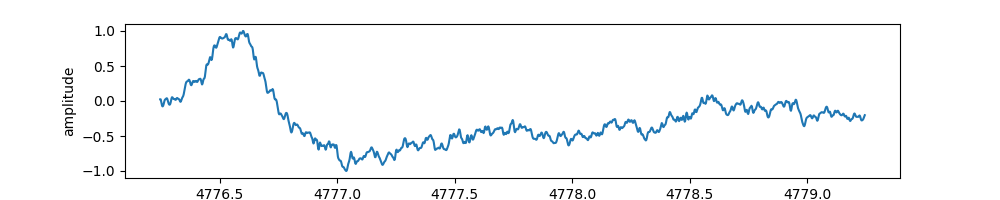

In [16]:
#Scale between -1 and 1
scalar = preprocessing.MinMaxScaler(feature_range=(-1, 1))
scaled_data = scalar.fit_transform(C1[:,None])
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(2)
plt.plot(time, scaled_data)
plt.xlabel("time")
plt.ylabel("amplitude")

In [22]:
print("Cut-off frequency", dutils.LPF_FC)
o = ONN(N=100, NEPOCHS=100, fc=dutils.LPF_FC)

def Run():
    o.fit(scaled_data, sampling_rate=500) #For EEG
th1 = threading.Thread(target=Run).start()

#TODO: Oversample

Cut-off frequency 100
End of epoch 0


In [24]:
#o.OMEGA = [] #Run to stop thread
o.progress
#dutils.show_inter_region_connectivity()
#print(o.OMEGA_VERBOSE_.shape)
#o.J

100.0

Text(0.5, 1.0, 'Plot valid only for generated test signal')

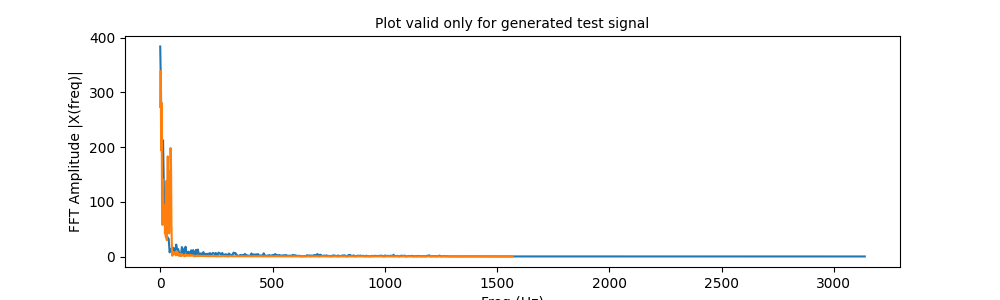

In [26]:
X, f_oneside_X = o.find_fft(scaled_data[:,0], 1000)
Z, f_oneside_Z = o.find_fft(o.SIG_, o.sampling_rate)
#Z, f_oneside_Z = o.find_fft(o.SIG_[o.NEPOCHS-1], o.sampling_rate)
#W, f_oneside_W = o.find_fft(o.ERR_SIG_[o.NEPOCHS-1,:], o.sampling_rate)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(3)
#plt.stem(f_oneside, np.abs(X[:n_oneside]), 'b', \
#         markerfmt=" ", basefmt="-b")
plt.plot(f_oneside_X, X, label="scaled data")
#plt.plot(f_oneside, np.abs(Y[:n_oneside]), label="Actual signal")
plt.plot(f_oneside_Z, Z, label="Reconstructed signal")
#plt.plot(f_oneside_W, W, label="Error Signal")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.title("Test signal")
plt.title("Plot valid only for generated test signal")
#plt.xscale("log")
#plt.yscale("log")
#plt.ylim(1, 300)
#plt.legend()

#remove 50Hz, LPF 150
#Wait for all value sto go to steady state and then cmpare the magnitude spectrum

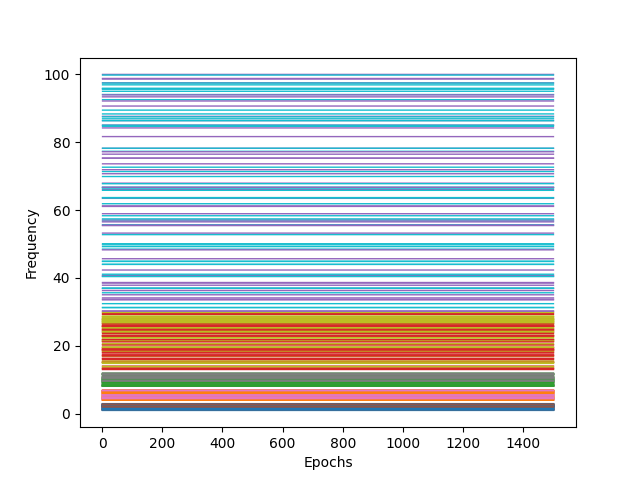

In [29]:
"""
Frequency details
"""
epochs = np.linspace(1, o.NSAMPLES+1, o.NSAMPLES+1)
f = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("Frequency")
for i in range(len(o.OMEGA_)):
    plt.plot(epochs, o.OMEGA_[i], linewidth=1)
# for i in range(len(o.OMEGA_Test)):
#     plt.axhline(y=o.OMEGA_Test[i], color='b', linestyle='--', linewidth=0.5)
plt.show()

No handles with labels found to put in legend.


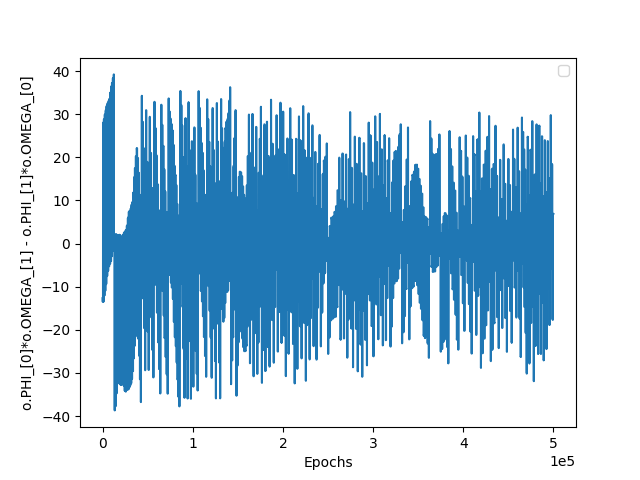

[[   0.         -286.6256258   -93.73632057  -51.79419312 -203.48889729
  -258.64278931 -270.5420177  -139.63430515  -86.76302113 -318.08703627
  -389.89837805 -105.53060411   24.08366402 -437.16221129 -503.70660241
  -370.70864102 -111.40648041 -257.48326615 -175.79284891 -210.44863917]
 [  48.44085057    0.         -317.04743193  139.40782237 -212.07606553
  -330.69653528 -477.01591274  -92.07336061 -251.58919178 -138.17596886
  -382.87779396 -330.62902538  -79.55642376 -188.88404155 -308.96020195
  -144.89803103  -35.64937565  -15.23374792 -243.90850356 -232.46307982]
 [-386.55818684 -150.45236293    0.           59.01703671 -208.79297925
    12.48113927 -279.32557516 -247.83210335 -374.19108613 -283.1758044
  -348.56303093 -465.07879962 -182.22976592 -497.57757509 -358.60254867
  -453.6509312  -103.72026434 -271.77665537 -145.28755127 -364.0802155 ]
 [-265.64603576 -264.29510172 -380.48506185    0.         -304.80757984
  -164.21541595 -337.90523786 -249.86758233 -251.4742762   -38

In [14]:
#Note: PHI is important and gives indication of frequency and not the omega itself
epochs = np.linspace(1, o.NSAMPLES+1, o.NSAMPLES+1)
f = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("o.PHI_[0]*o.OMEGA_[1] - o.PHI_[1]*o.OMEGA_[0]")
#for i in range(len(o.PHI)):
#    plt.scatter(epochs, np.sin(o.PHI_[i]), s=0.4)
#This term should be constant
plt.plot(epochs, o.PHI_[0]*o.OMEGA_[1] - o.PHI_[1]*o.OMEGA_[0])
plt.legend()
plt.show()
print(o.THETA)

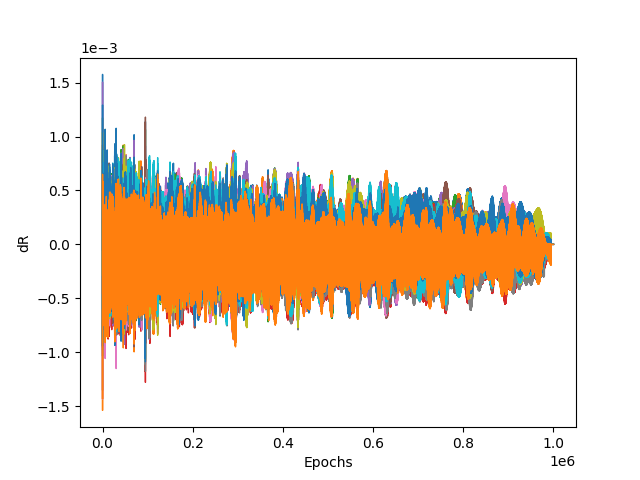

In [179]:
"""
dR and dPHI
dR is zero, dPHI is periodic (not expected)
"""
epochs = np.linspace(1, o.NSAMPLES, o.NSAMPLES)
epochs = np.linspace(1, o.NEPOCHS*o.NSAMPLES, o.NEPOCHS*o.NSAMPLES)
f = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("dR")
for i in range(len(o.dR_)):
    plt.plot(epochs, o.dR_[i], linewidth=1, label="Oscillator amplitude (R)"+str(i))
    #plt.plot(epochs, o.R_CPL_[i], linewidth=1, label="Coupling (R_CPL)"+str(i))
#plt.legend()
plt.show()

# #epochs = np.linspace(1, o.NSAMPLES+1, o.NSAMPLES+1)
# epochs = np.linspace(1, o.NEPOCHS, o.NEPOCHS)
# f = plt.figure()
# plt.xlabel("Epochs")
# plt.ylabel("R")
# for i in range(len(o.R_)):
#     plt.plot(epochs, o.R_[i], linewidth=1, label="Oscillator amplitude (R)" + str(i))
# #plt.legend()
# plt.show()

#epochs = np.linspace(1, o.NSAMPLES, o.NSAMPLES)
# epochs = np.linspace(1, o.NEPOCHS*o.NSAMPLES, o.NEPOCHS*o.NSAMPLES)
# f = plt.figure()
# plt.xlabel("Epochs")
# plt.ylabel("dPHI")
# f.set_figwidth(10)
# f.set_figheight(4)
# #plt.scatter(epochs, o.dPHI_[11], s=0.2)
# for i in range(len(o.dPHI_)):
#     plt.scatter(epochs, o.dPHI_[i], s=0.2)
#     #plt.plot(epochs, o.PHI_CPL_[i], linewidth=1, label="Coupling (PHI_CPL)")
# # #plt.legend()
# plt.show()

# epochs = np.linspace(1, o.NEPOCHS, o.NEPOCHS)
# f = plt.figure()
# plt.xlabel("Epochs")
# plt.ylabel("dOMEGA_")
# for i in range(len(o.dOMEGA_)):
#     plt.plot(epochs, o.dOMEGA_[i], linewidth=1)
#     #plt.plot(epochs, o.PHI_CPL_[i], linewidth=1, label="Coupling (PHI_CPL)")
# plt.legend()
# plt.show()

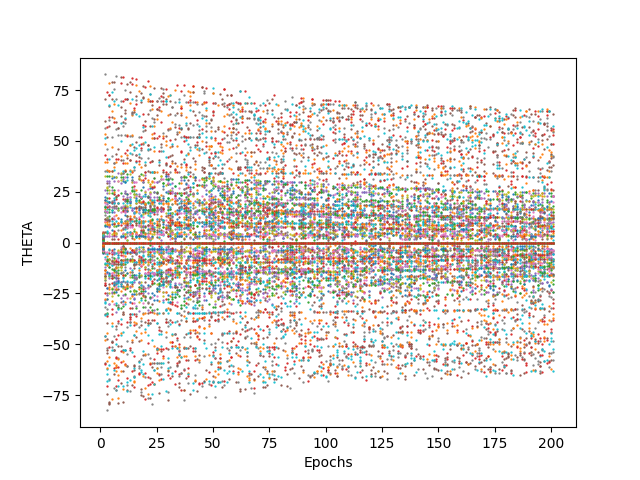

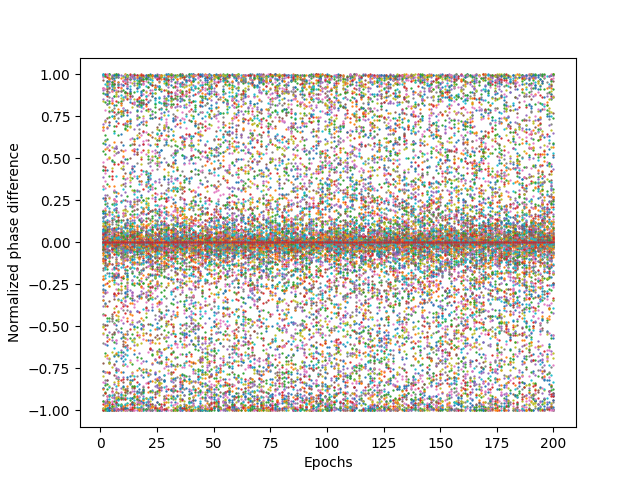

In [180]:
"""
THETA details (Display normalized pahse difference instead)
THETA(IJ) should be symmetric
Consider these connection only for connected pair
"""
bin_conn = np.zeros([o.N, o.N])
bin_conn[o.J > 0] = 1

#epochs = np.linspace(1, o.NSAMPLES+1, o.NSAMPLES+1)
epochs = np.linspace(1, o.NEPOCHS+1, o.NEPOCHS+1)
f = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("THETA")
for i in range(o.N):
    for j in range(o.N):
        plt.scatter(epochs, o.THETA_[i][j], s=0.4)
plt.show()

"""
Normalized phase difference should be zero at steady state
Is this way of calculating NPD correct? PHI dot can be different from OMEGA (yes most likely)
"""
#epochs = np.linspace(1, o.NSAMPLES, o.NSAMPLES)
epochs = np.linspace(1, o.NEPOCHS, o.NEPOCHS)
f = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("Normalized phase difference")
for i in range(o.N):
    for j in range(o.N):
        plt.scatter(epochs, np.sin(o.OMEGA[i]*o.NORM_PHASE_DIFF_[i][j]), s=0.4) #linewidth=1
plt.show()


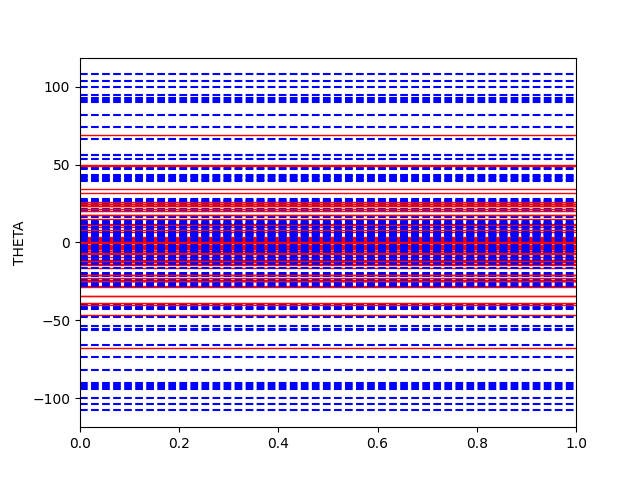

In [153]:
f = plt.figure()
for i in range(o.N):
    for j in range(o.N):
        plt.axhline(y=o.THETA_Test[i][j], color='b', linestyle='--', label="test signal")
        plt.axhline(y=o.THETA[i][j], color='r', linewidth=1, label="reconstructed")
plt.ylabel("THETA")
#plt.legend()
plt.show()

# print("Test theta: \n", o.THETA_Test)
# print("Theta: \n", o.THETA)
# print("PHI: \n", o.PHI)
# print("OMEGA: \n", o.OMEGA)
# INT_MAT = (o.PHI*o.OMEGA.T - o.PHI.T*o.OMEGA - o.THETA)/(np.pi*o.OMEGA.T)
# print("THETA recalculated: \n", INT_MAT)

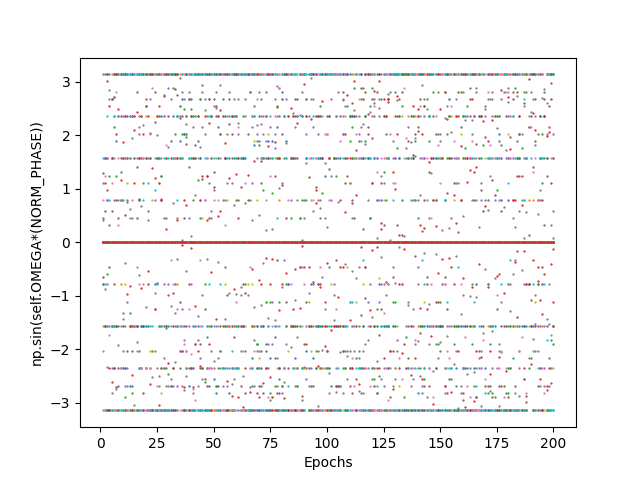

In [154]:
bin_conn = np.zeros([o.N, o.N])
bin_conn[o.J > 0] = 1

epochs = np.linspace(1, o.NEPOCHS, o.NEPOCHS)
f = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("np.sin(self.OMEGA*(NORM_PHASE))")
for i in range(o.N):
    for j in range(o.N):
        #Entries here should be zero
        plt.scatter(epochs, bin_conn[i][j]*o.dW_[i][j], s=0.4)
plt.show()

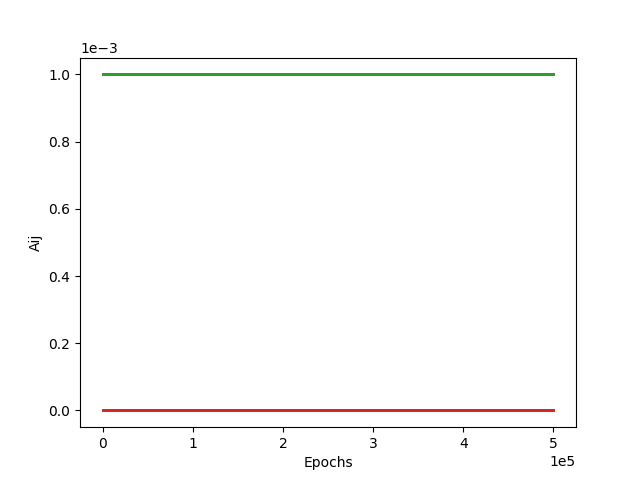

In [11]:
"""
THETA details (Display normalized pahse difference instead)
THETA(IJ) should be symmetric
Consider these connection only for connected pair
"""

epochs = np.linspace(1, o.NSAMPLES, o.NSAMPLES)
f = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("Aij")
for i in range(o.N):
    for j in range(o.N):
        #Entries here should be zero
        plt.scatter(epochs, o.bin_conn[i][j]*o.J_[i][j], s=0.4)
plt.show()

In [24]:
X = np.fft.fft(o.SIG_[o.NEPOCHS-1])
N = len(X)
print(N)
n = np.arange(int(N/2))
T = N/o.sampling_rate
freq = n/T
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(2)
#plt.stem(f_oneside, np.abs(X[:n_oneside]), 'b', \
#         markerfmt=" ", basefmt="-b")
plt.plot(f_oneside, np.abs(X[:n_oneside]))
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.title("Reconstructed signal")
#plt.xscale("log")
#plt.yscale("log")
#plt.ylim(1, 300)

#remove 50Hz, LPF 150

IndexError: tuple index out of range

(5000,)


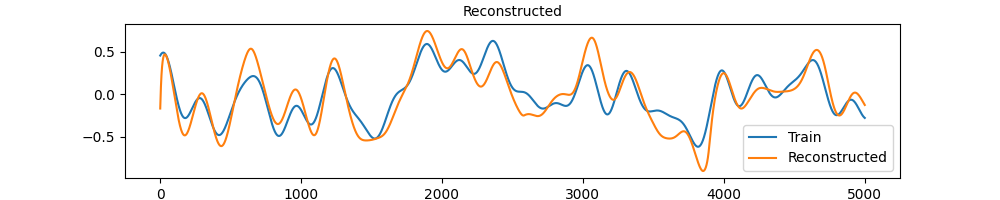

In [183]:
#TODO: Try exponenial distribution for amplitudes

#scalar = preprocessing.MinMaxScaler()
#scaled_data = scalar.fit_transform(C1[:,None])
epochs = np.linspace(1, o.NSAMPLES, o.NSAMPLES)
#epochs = np.linspace(1, o.NEPOCHS, o.NEPOCHS)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(2)
plt.title("Train")
plt.plot(epochs, scaled_data.flatten(), label="Train")

#data = o.SIG_
data = o.SIG_[o.NEPOCHS-1]
print(data.shape)
plt.title("Reconstructed")
plt.plot(epochs, data.flatten(), label="Reconstructed")
plt.legend()

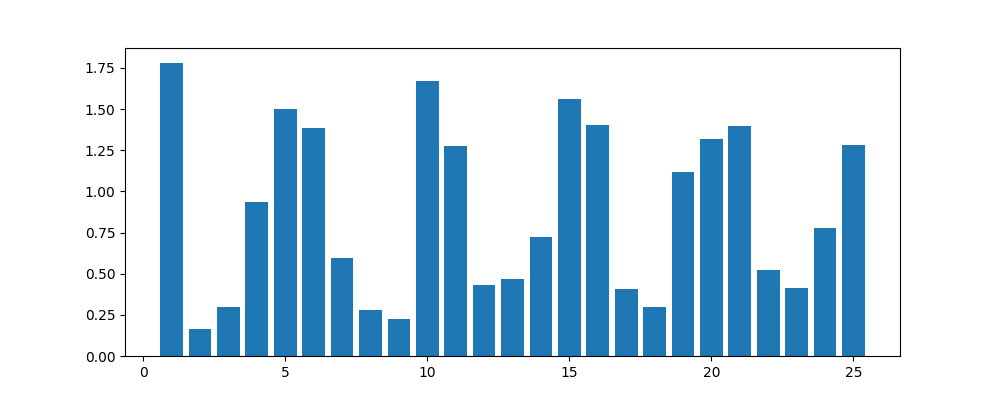

In [18]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(4)
plt.bar(np.linspace(1, o.N, o.N), o.OMEGA_[:,0] - o.OMEGA_[:,o.NSAMPLES])
plt.show()
#Difference is mostly positive - oscillators still favoring lower frequencies

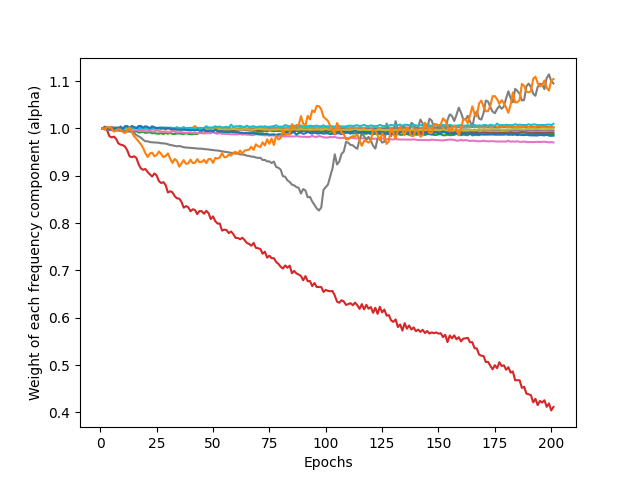

In [182]:
#epochs = np.linspace(1, o.NSAMPLES+1, o.NSAMPLES+1)
epochs = np.linspace(1, o.NEPOCHS+1, o.NEPOCHS+1)
f = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("Weight of each frequency component (alpha)")
FINAL_VALS = []
for i in range(len(o.ALPHA_)):
    plt.plot(epochs, o.ALPHA_[i], label=str(i+1))
    FINAL_VALS.append(o.ALPHA_[i][o.NEPOCHS-1])
plt.show()

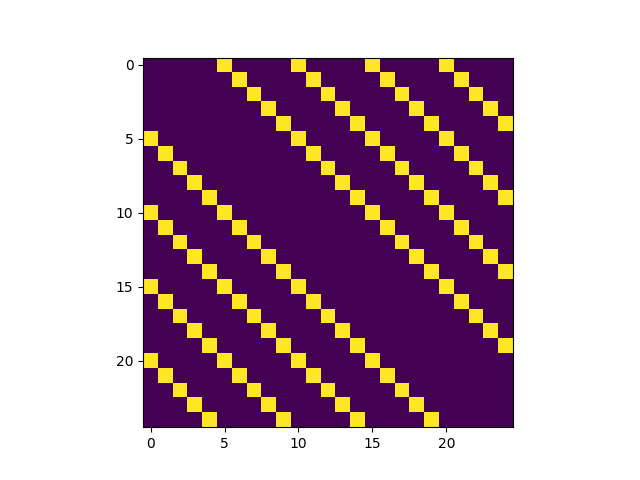

In [28]:
f = plt.figure()
plt.imshow(o.J) #plt.imshow(o.J, alpha=(1-o.P_VAL))
plt.show()

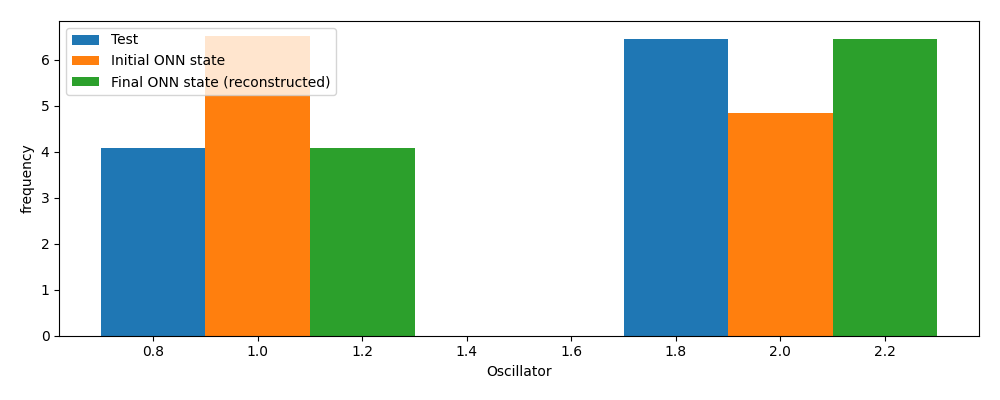

In [19]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(4)
plt.bar(np.linspace(1, o.N, o.N)-0.2, o.OMEGA_Test.flatten(), 0.2, label="Test")
plt.bar(np.linspace(1, o.N, o.N), o.OMEGA_[:,0].flatten(), 0.2, label="Initial ONN state")
plt.bar(np.linspace(1, o.N, o.N)+0.2, o.OMEGA_[:,o.NSAMPLES].flatten(), 0.2, label="Final ONN state (reconstructed)")
plt.legend()
plt.ylabel("frequency")
plt.xlabel("Oscillator")
f.tight_layout()
plt.show()

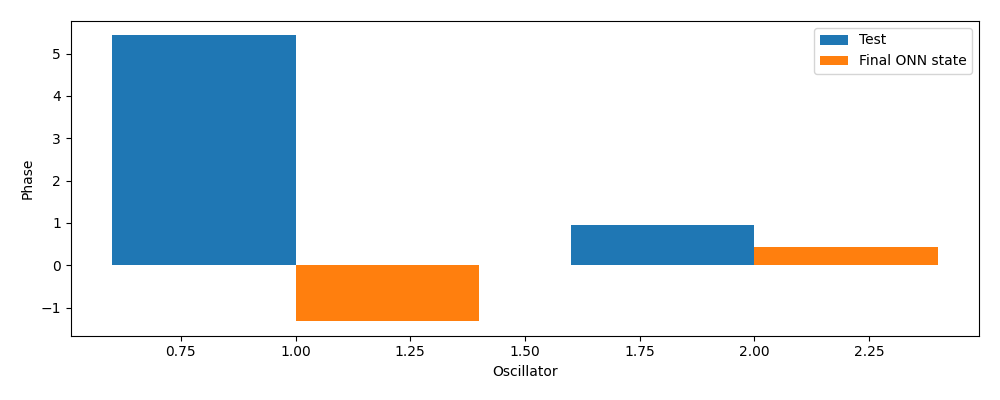

In [17]:
#Plot lateral weight instead
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(4)
plt.bar(np.linspace(1, o.N, o.N)-0.2, o.PHI_Test.flatten(), 0.4, label="Test")
plt.bar(np.linspace(1, o.N, o.N)+0.2, o.PHI.flatten(), 0.4, label="Final ONN state")
plt.legend()
plt.ylabel("Phase")
plt.xlabel("Oscillator")
f.tight_layout()
plt.show()

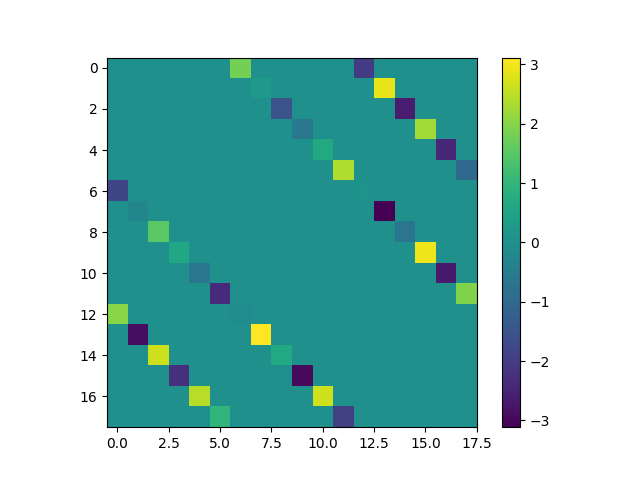

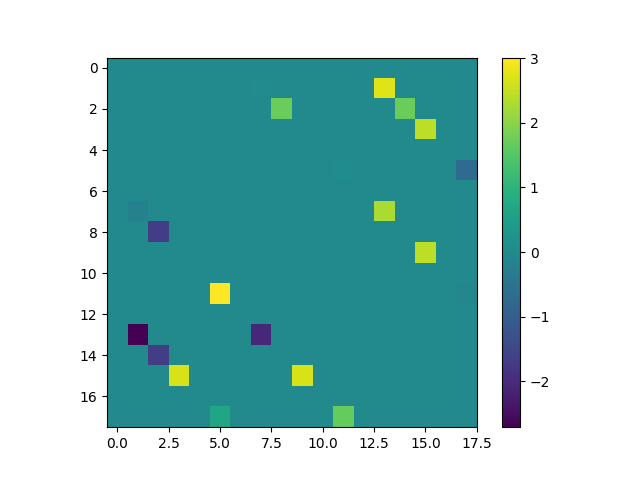

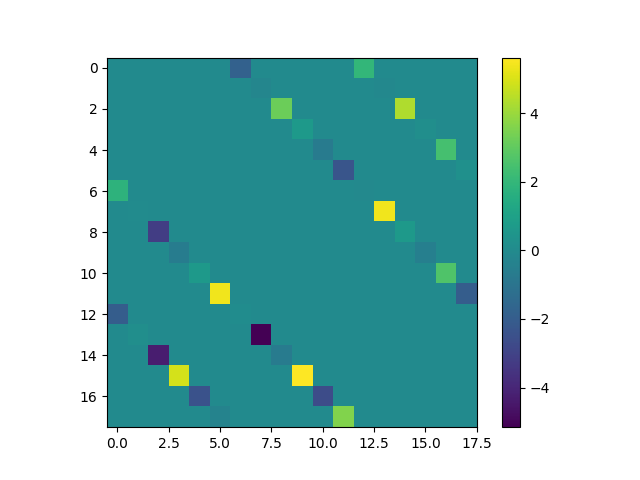

In [21]:
#TODO: This should be replaced with derived value of theta
#Check generate_signal function
#θ12= π*(n*ω01*ω02+2K*ω02-2p*ω01)+ φ1*ω02- φ02*ω01
#Use π normalization to extract useful information (φ1*ω02- φ02*ω01)%π
#Note: (φ1*ω02- φ02*ω01) might not necessarly be exactly extracted since it can be greater than π

#Binary connections
bin_conn = np.zeros([o.N, o.N])
bin_conn[o.J > 0] = 1

f = plt.figure()
norm_val = np.exp(1j*o.THETA_Test) ##Filter connected oscillator only
norm_val1 = np.angle(norm_val)
plt.imshow(norm_val1*bin_conn) #%(2*np.pi)
plt.colorbar()
plt.show()

f = plt.figure()
norm_val = np.exp(1j*o.THETA_[:,:,o.NEPOCHS]) ##Filter connected oscillator only
norm_val2 = np.angle(norm_val)
plt.imshow(norm_val2*bin_conn) #%(2*np.pi) ##Filter connected oscillator only
plt.colorbar()
plt.show()

f = plt.figure()
plt.imshow((norm_val2 - norm_val1)*bin_conn) #%(2*np.pi) ##Filter connected oscillator only
plt.colorbar()
plt.show()

In [13]:
debug

> /home/jupyter-avinash/ranjan_env/lib/python3.9/site-packages/pandas/core/internals/construction.py(422)_check_values_indices_shape_match()
    420         passed = values.shape
    421         implied = (len(index), len(columns))
--> 422         raise ValueError(f"Shape of passed values is {passed}, indices imply {implied}")
    423 
    424 



ipdb>  data.shape


*** NameError: name 'data' is not defined


ipdb>  data


*** NameError: name 'data' is not defined


ipdb>  values.shape


(696966, 30)


ipdb>  q


In [ ]:
#
#Amplitude can change during training
#Multiple oscillator in brain region